# Analysing the used car market

**In this captivating data exploratory project, we delve into the intricate world of used car sales using a comprehensive dataset sourced from Cars Dekho, a prominent online car selling platform. By harnessing the power of advanced analytical techniques and visualization tools, we aim to unravel the factors that influence pricing, identify popular car brands and models, uncover regional variations in demand, and discern the dominant features sought by buyers in the pre-owned car market. Join us on this thrilling expedition as we extract meaningful patterns, correlations, and predictive insights from the extensive dataset, providing valuable knowledge to prospective buyers, aiding sellers in optimizing pricing strategies, and offering industry experts and researchers a deeper understanding of the evolving dynamics of the used car sales landscape.**

![](https://images.pexels.com/photos/63294/autos-technology-vw-multi-storey-car-park-63294.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Imported important libraries

### Downloading the dataset

**This dataset is downloaded from Kaggle it is about the used car market analysis from a platform called Car Dekho. Car Dekho is an online platform that helps users buy and sell used cars in India.
The dataset likely contains information about various used cars listed on the Car Dekho platform.
The source of this dataset is Kaggle, a popular platform for data science and data analysis. Kaggle hosts a wide range of datasets contributed by the data science community and companies. In this case, the dataset was likely uploaded by someone who obtained the data from Car Dekho or a related source.
The dataset include columns:**
- car_name- Full name of the car
- brand - The brand of the car
- model - The model of the car
- vehicle_age - How old it is
- km_driven - How much km the car has been driven
- fuel_type --On which fuel the car runs
- transmission_type- Transmission the car uses
- mileage - The mileage of the car
- engine- The capicity of engine in cc
- max_power- Maximum power the car can generate
- seats - The number of seats it contain
- selling_price - The price at which it was sold**



**Follow following steps to download the data set**
1. Decide a topic you want to do data analysis with you can find various data sets regarding to it.
2. The data used in this analysis has been downloaded from kaggle.com 
3. Simply download the data to your system.
4. The data will be in a zip format left click on it and use unzip it.
5. Open jupyter notebook and on landing page top right corner there will be an option for upload.
6. Upload the data there and open a new notebook.
7. You will be able to read csv file as pandas data frame from following code.

### Importing data and converting it to pandas dataframe

In [8]:
usedcar_df=pd.read_csv('cardekho_dataset.csv')

In [9]:
usedcar_df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### Data cleaning and understanding the data

**Now we are going to  explore through the data like finding no of rows and columns are present, their ranges etc. We will also handle duplicate entries and missing or irrelevant data if present.**

In [10]:
usedcar_df.shape

(15411, 14)

In [11]:
usedcar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


- All the details about the data has been shown here its count, dtypes and the null and non null values count. we c..an make aur decision about how we need to proceed to clean the data.
- The data is almost clean there are no null values all the dtypes are correct. If we didn't find the data clean we can change the data types according to our needs

In [12]:
usedcar_df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


- Here we can see how the data vary is we find some unusual high or low vales we can change it or remove the row if it wont make any difference in our analysis. there seems no unusual value so we can move forwrd with our analysis. But there is an column whic is unusual we can remove it as it is not defined.

In [13]:
usedcar_df.drop('Unnamed: 0',axis=1,inplace=True)

- We drops the unnamed column as it didn't contained any usefull information.

In [14]:
usedcar_df.drop_duplicates(inplace=True)

- Here we removed the duplicates values which has exactly the same info in every column as it will only deviate our analysis from the real results and trends.

### Exploratry data analysis

**Conducting an exploratory data analysis (EDA) on used car market data will provide valuable insights into trends, pricing dynamics, and consumer preferences. This analysis aims to uncover patterns, relationships, and key factors influencing the pricing and demand of used cars. By examining various variables such as car make, model, year, mileage, and price, we can gain a deeper understanding of the factors that drive the market and make informed decisions in this industry. Let's delve into the dataset and explore the fascinating world of the used car market.**

In [15]:
usedcar_df.nunique()

car_name              121
brand                  32
model                 120
vehicle_age            24
km_driven            3688
seller_type             3
fuel_type               5
transmission_type       2
mileage               411
engine                110
max_power             342
seats                   8
selling_price        1086
dtype: int64

- Shows how many unuqies values are there in every column. 
- It should be noted that there are 32 brands and about 121 car names we must proced at first with brand and then cut down to models in each brand as names are in very high number and it will be difficult to make any anlysis with them.

In [16]:
uc_brand=usedcar_df.groupby('brand',as_index=False)['model'].count().sort_values(by='model',ascending=False)

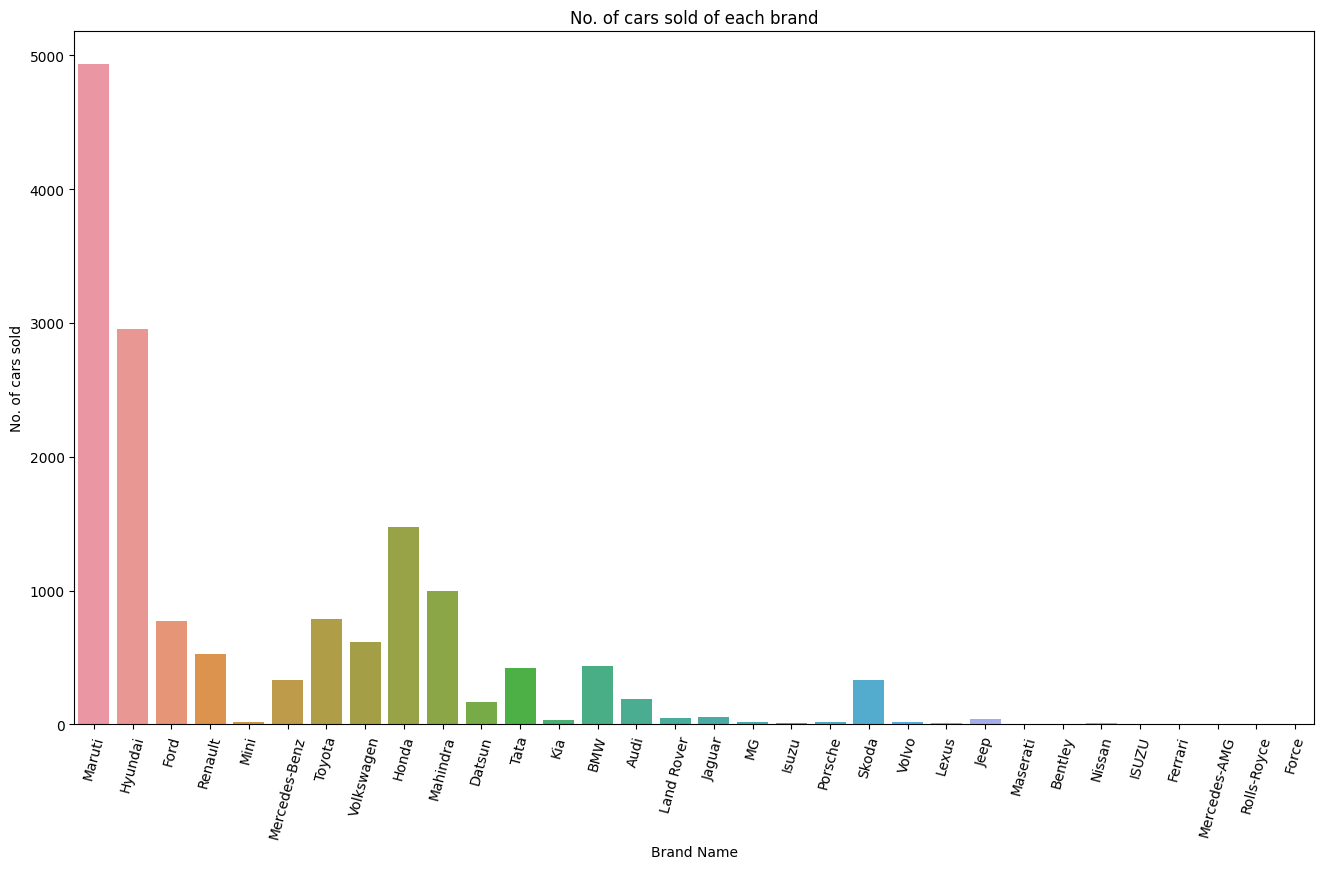

In [17]:
sns.countplot(data=usedcar_df,x='brand')
matplotlib.rcParams['figure.figsize']=(32,10)
plt.xticks(rotation=75)
plt.xlabel('Brand Name')
plt.ylabel('No. of cars sold')
plt.title('No. of cars sold of each brand')
plt.rcParams['font.size']=28;

- Maruti sells the most number of cars followed by Hyundai. These two brands have very high market share as compared to others.

In [18]:
uc_price=usedcar_df.groupby('brand',as_index=False)['selling_price'].mean().sort_values(by='selling_price')
uc_price.tail()

,brand,selling_price
15,Lexus,5.262778e+06
19,Maserati,6.100000e+06
2,Bentley,9.266667e+06
26,Rolls-Royce,2.420000e+07
4,Ferrari,3.950000e+07


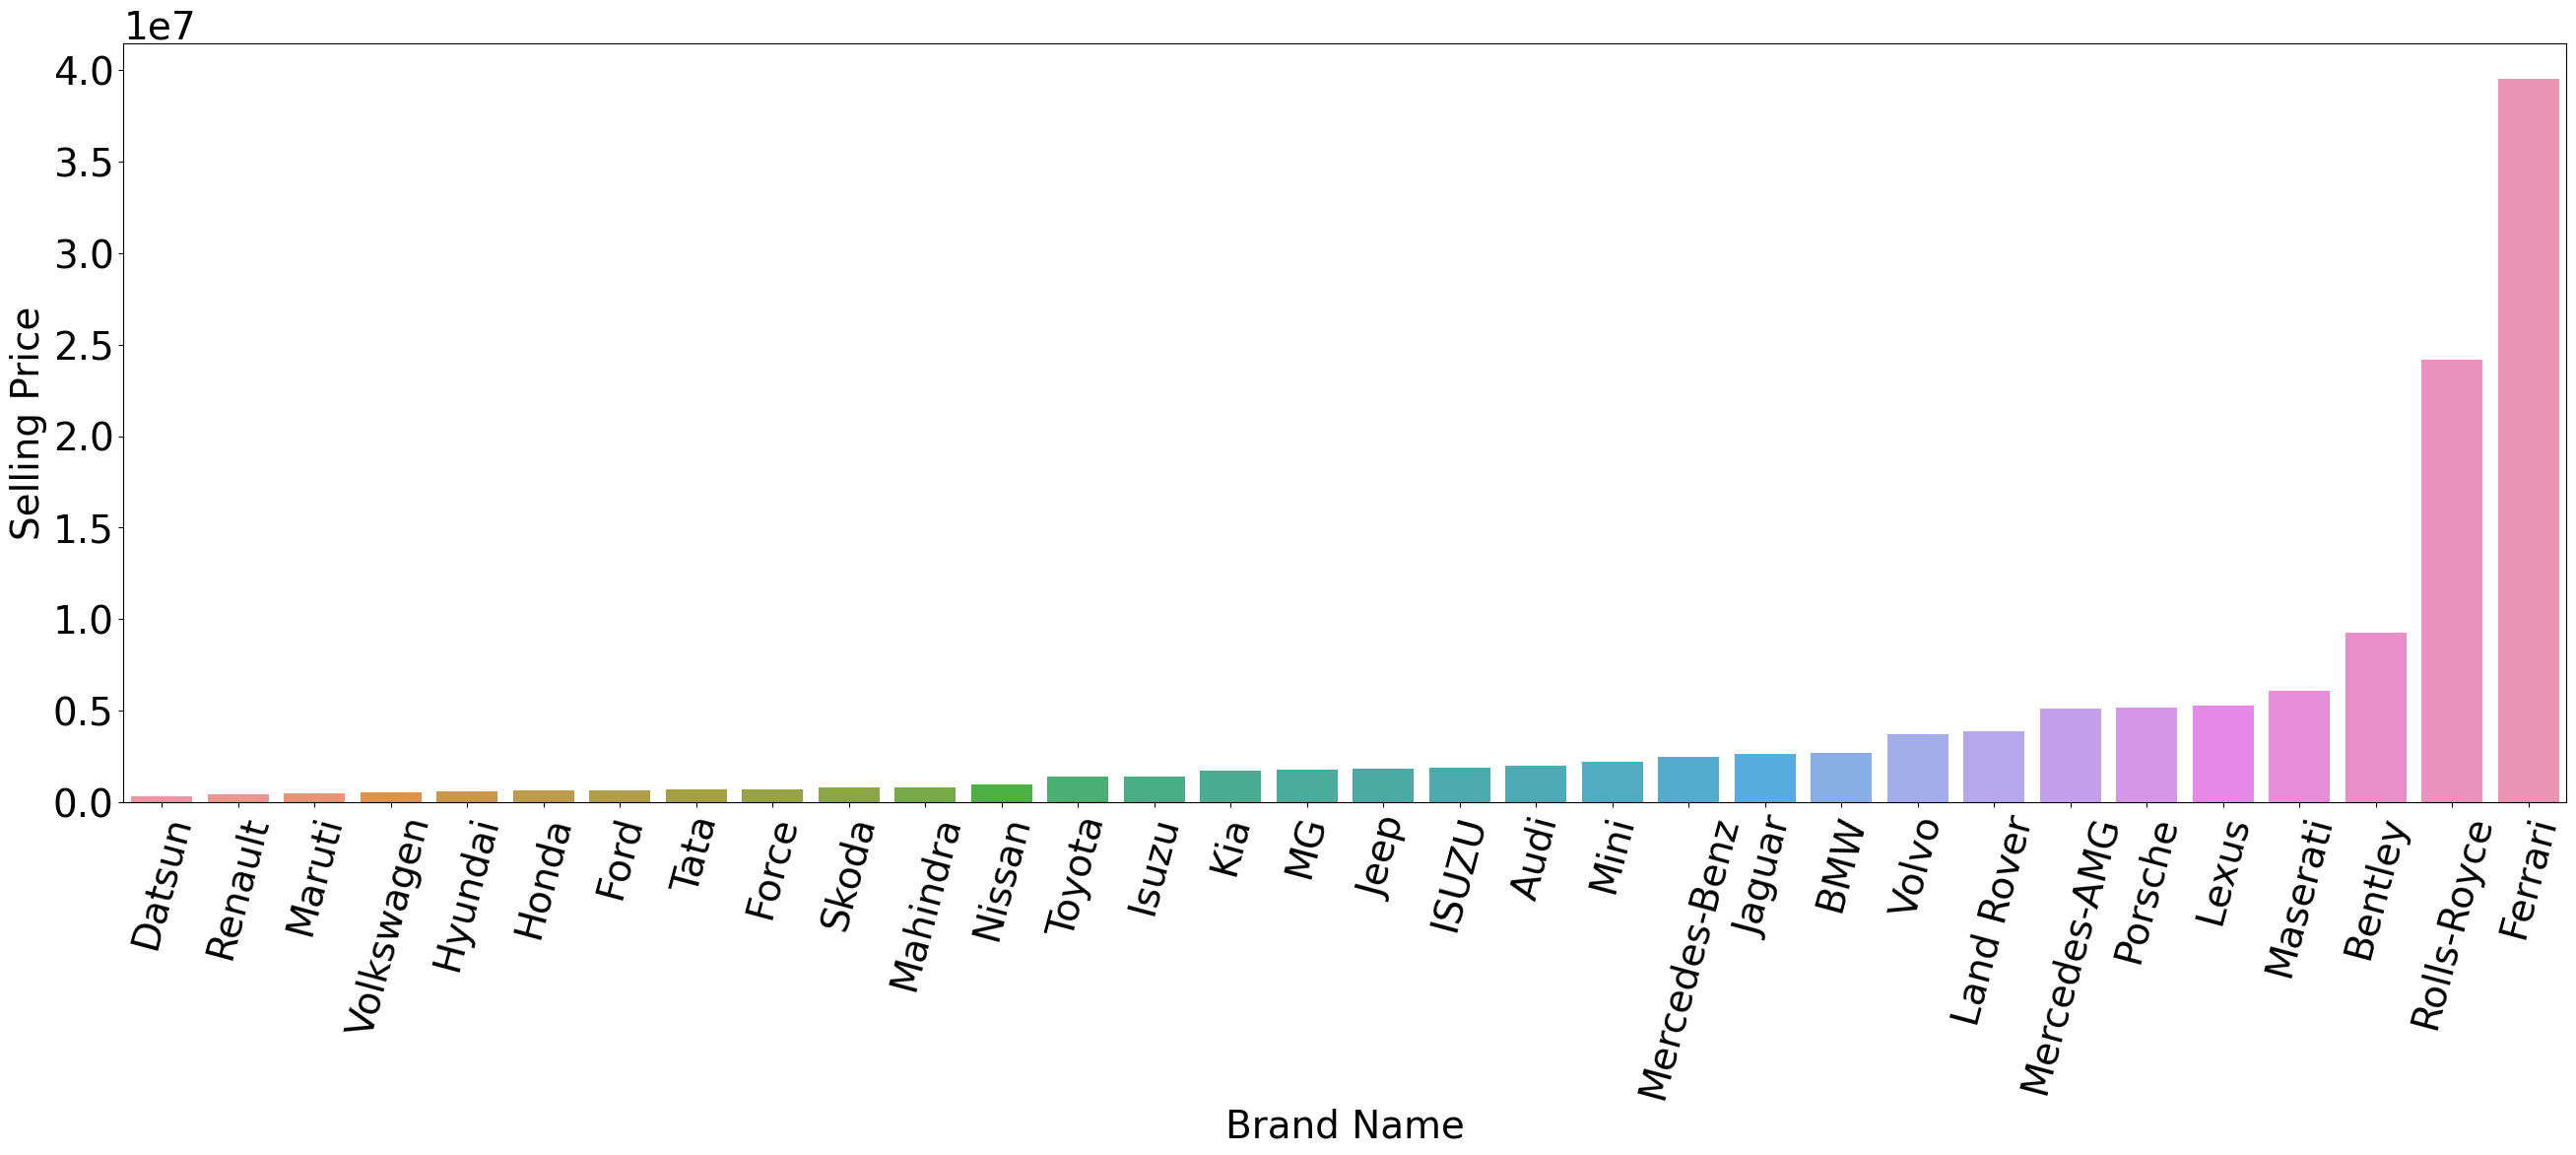

In [19]:
sns.barplot(x=uc_price['brand'],y=uc_price['selling_price'])
matplotlib.rcParams['figure.figsize']=(22,10)
plt.xlabel('Brand Name')
plt.ylabel('Selling Price')
plt.xticks(rotation=75)
plt.rcParams['font.size']=28;

- There seems to be a inverce relation b/w price of car and number of cars in used cars market.
- Some exceptions like datson and renault are there bcz of their low market size.
- This also conclude india a price sensitive market and even while buying a secound hand car they prefer cars which are more value for money.

In [20]:
fuel_type_df=usedcar_df.groupby('fuel_type', as_index=False)['brand'].count()
fuel_type_df.columns=('Fuel Type','No. of vehicles')
fuel_type_df

,Fuel Type,No. of vehicles
0,CNG,299
1,Diesel,7342
2,Electric,4
3,LPG,44
4,Petrol,7555


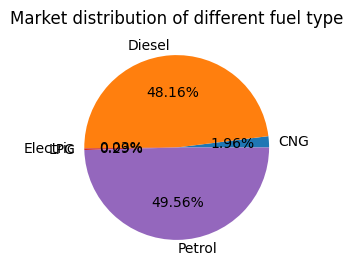

In [22]:
plt.pie(fuel_type_df['No. of vehicles'],labels=fuel_type_df['Fuel Type'],autopct='%1.2f%%')
matplotlib.rcParams['figure.figsize']=(3,3)
plt.title('Market distribution of different fuel type')
matplotlib.rcParams['font.size']=10;

- The market is highly dominated by Petrol and Diesel cars.The cng cars and electric cars share very negligible market share which is also a concerning thing as these cars are better for environment. These markets are new and their growth by year data can help us analysis more details.

In [23]:
fueltype_df=usedcar_df.groupby('fuel_type', as_index=False)['selling_price'].median().sort_values(by='selling_price',ascending=False)
fueltype_df

,fuel_type,selling_price
2,Electric,1857500.0
1,Diesel,700000.0
4,Petrol,460000.0
0,CNG,370000.0
3,LPG,182500.0


''

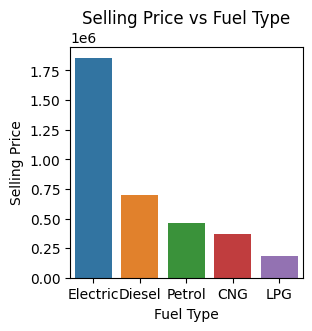

In [24]:
chart=sns.barplot(data=fueltype_df,x='fuel_type',y='selling_price',ci=None)
chart.set_xlabel('Fuel Type')
chart.set_ylabel('Selling Price')
chart.set_title('Selling Price vs Fuel Type')
;

- Electric cars are way more costly then the other fuel cars.
- Diesel cars are on an average more expensive than the petrol cars.
- There seems to be an intresting fact that the price for cng cars is less than petrol cars in used market but for the new cars its in the reverse order,cng cars are more expensive. Thus a conclusion can be made that cng cars losses more value.

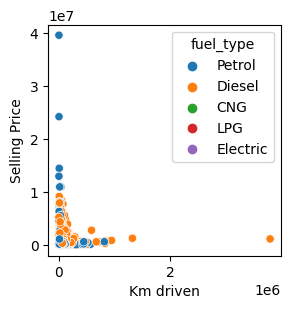

In [25]:
sns.scatterplot(data=usedcar_df,x='km_driven',y='selling_price',hue='fuel_type')
plt.xlabel('Km driven')
plt.ylabel('Selling Price')
matplotlib.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(15,8);

- The km driven and selling price is in inverse relation. The more the car has been driven the less it sells for and vice versa.
- Diesel cars have higger value than the petrol cars even for the same km driven.Diesel cars have higher initial buying cost so the same trend continues.

''

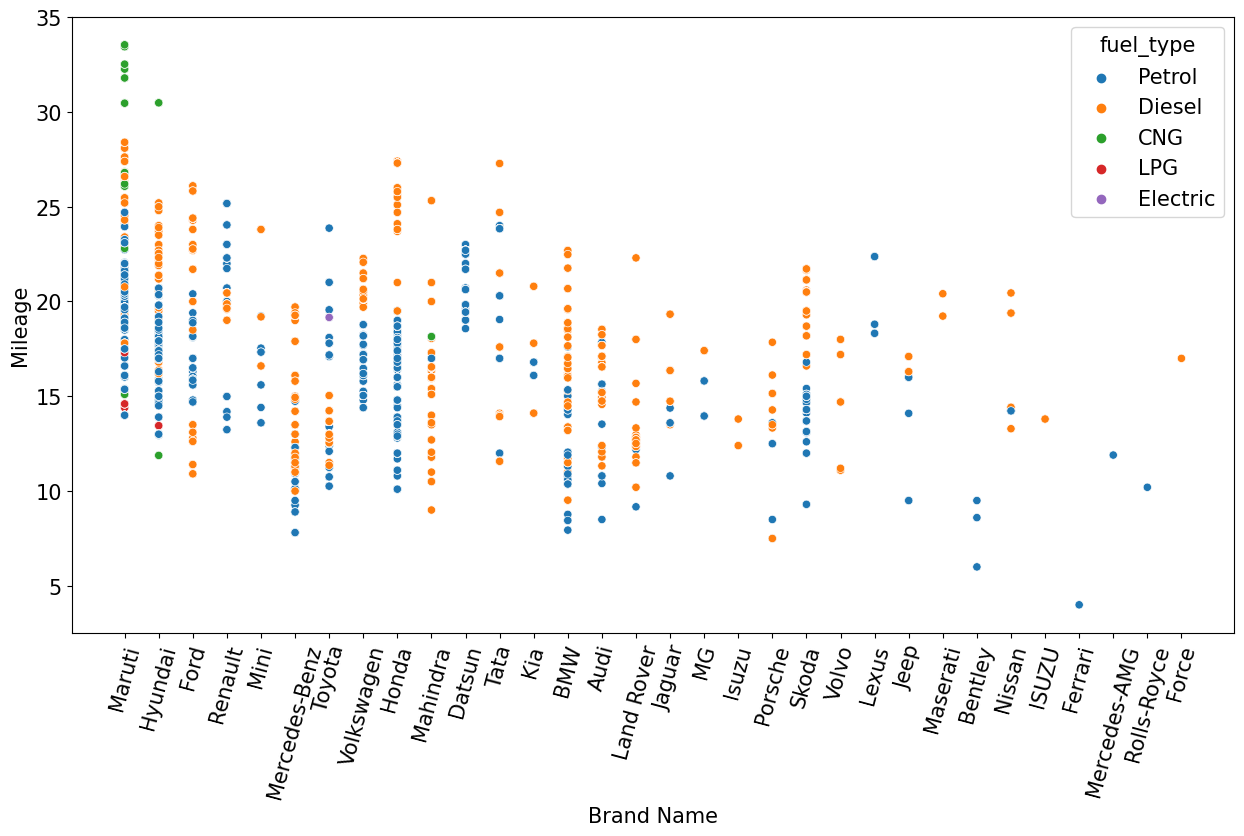

In [26]:
sns.scatterplot(data=usedcar_df,x='brand',y='mileage',hue='fuel_type')
plt.xticks(rotation=75)
plt.xlabel('Brand Name')
plt.ylabel('Mileage')
matplotlib.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(5,12)
;

- The milage and selling price is higher for diesel cars compared to petrol cars.
- CNG cars have best milage.

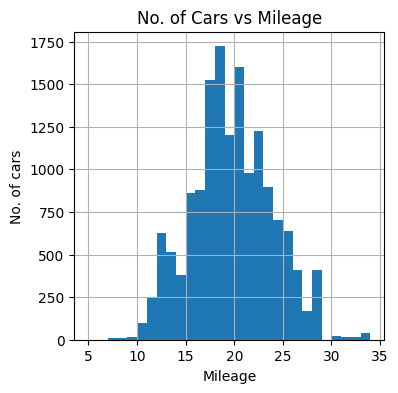

In [28]:
plt.hist(usedcar_df['mileage'],bins=range(5,35,1))
plt.rcParams['figure.figsize']=(4,4)
plt.xlabel('Mileage')
plt.ylabel('No. of cars')
plt.title('No. of Cars vs Mileage')
matplotlib.rcParams['font.size']=10
plt.grid(True);

Maximum cars given a mileage between 19-20 kmpl. Cng and Electric cars lies in the higher range of milage.

In [29]:
milage_df=usedcar_df.groupby('brand',as_index=False)['mileage'].mean().sort_values(by='mileage',ascending=False).head(10)
milage_df


,brand,mileage
18,Maruti,22.425520
25,Renault,22.073586
3,Datsun,21.215647
15,Lexus,20.676667
6,Ford,19.970335
7,Honda,19.901463
19,Maserati,19.820000
28,Tata,19.780855
8,Hyundai,19.590650
30,Volkswagen,18.690977


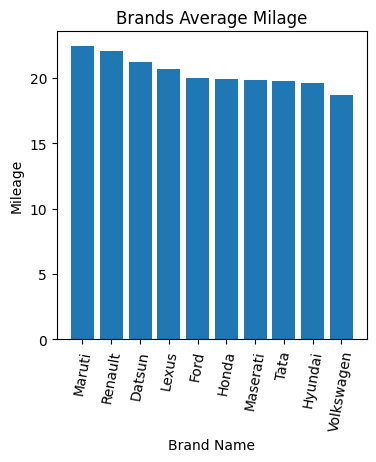

In [30]:
plt.bar(x='brand',height='mileage',data=milage_df)
plt.xlabel('Brand Name')
plt.ylabel('Mileage')
plt.title('Brands Average Milage')
matplotlib.rcParams['font.size']=10
plt.xticks(rotation=80);

The maruti cars have highest mileage. The low cost and high mileage of maruti indicates its popularity in a middle class intensive market like India. Also datsun and renault even after having better price and same mileage like maruti are way away than maruti in market share. We will need more data about features, maintainace ,availablity,service stations,after sales service and some data to understand these difference.

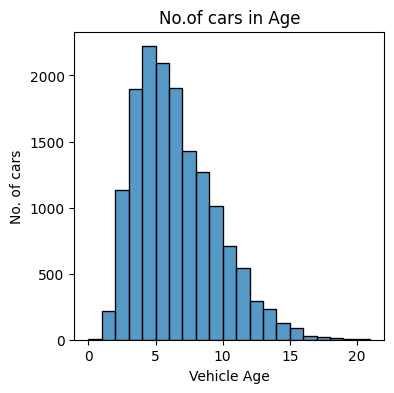

In [31]:
sns.histplot(usedcar_df['vehicle_age'],bins=range(0,22,1))
plt.xlabel('Vehicle Age')
plt.ylabel('No. of cars')
plt.title('No.of cars in Age');

Most of the vehicals are 5-7 years old.The vehicle older than 10 years are less as diesel vehicle after 10 years are not allowed in many states.

In [32]:
usedcar_df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [33]:
carseller_df=usedcar_df.groupby('seller_type',as_index=False)['car_name'].count()
carseller_df.columns=['Seller_type','No. of cars']
carseller_df

,Seller_type,No. of cars
0,Dealer,9459
1,Individual,5612
2,Trustmark Dealer,173


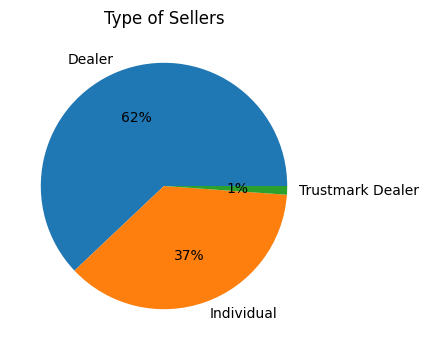

In [34]:
plt.pie(carseller_df['No. of cars'],labels=carseller_df['Seller_type'],autopct='%.0f%%')
plt.title('Type of Sellers');

- The highest percentage of sellers are dealers and only one percent are trustmark dealers.The indivisual sellers has less share may be due to poor market targeting.Lack of awarness or a difficuly selling process can be some of the reasons. 

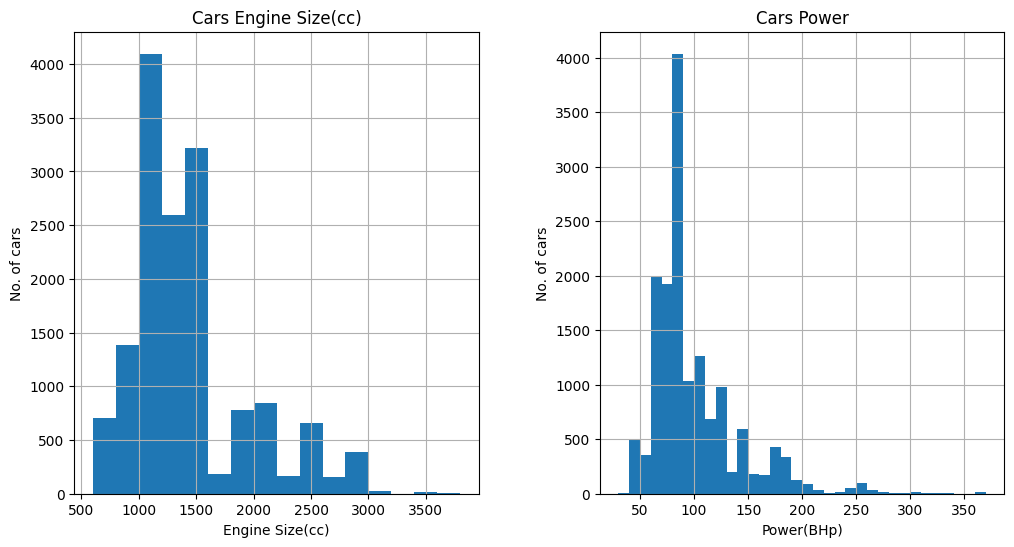

In [36]:
fig,axes=plt.subplots(1, 2,figsize=(12,6))
usedcar_df.hist('engine',ax=axes[0],bins=range(600,4000,200))
axes[0].set_title('Cars Engine Size(cc)')
axes[0].set_xlabel('Engine Size(cc)')
axes[0].set_ylabel('No. of cars')
axes[1].set_xlabel('Power(BHp)')
axes[1].set_ylabel('No. of cars')
usedcar_df.hist('max_power',ax=axes[1],bins=range(30,380,10))
axes[1].set_title('Cars Power');

- Maximum cars are with medium sized engine and with 90Bhp horse power.Most of the cars lie in a good mileage  giving category which decreases the power of car and the engine size.

In [37]:
transmission_df=usedcar_df.groupby('transmission_type',as_index=False)["brand"].count()
transmission_df

,transmission_type,brand
0,Automatic,3150
1,Manual,12094


''

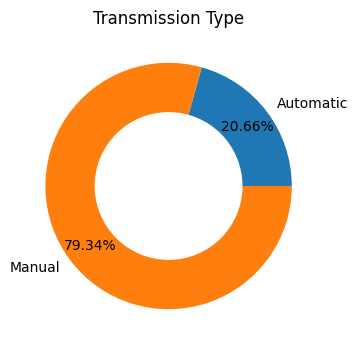

In [38]:
plt.pie(transmission_df['brand'],labels=transmission_df['transmission_type'],autopct='%.2f%%',pctdistance=.8)
plt.title('Transmission Type')
centre_circle=plt.Circle((0,0),.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
;

- Maximum cars are manual. The reason may be automatic cars are more expensive and is a new concept.Automatic cars are very handy and better for new drivers.Automatic market 

**We performed an exploratry data analysis on the cardekho sales dataset.We delved into the used car market, aiming to uncover insights about pricing and demand. Through meticulous data cleaning and preprocessing, we ensured the reliability and consistency of our dataset. Employing a combination of descriptive analysis, inferential analysis, and predictive modeling, we extracted meaningful patterns and trends.
Our descriptive analysis provided a comprehensive overview of the market, revealing the distribution and summary statistics of key variables such as car make, model, year, mileage, and price. Visualizations aided in identifying popular car brands, discerning age and mileage patterns, and understanding price ranges.
Moving on to inferential analysis, we examined correlations between various attributes and their impact on used car prices. Mileage, age, fuel type, and brand reputation emerged as significant factors influencing pricing trends.
We got a good idea about the data,trends and the market of used cars.**

### Asking Questions

**Now we can ask specific questions or address specific business problems and make data driven decisions.**

##### Q1 Which are 10 highest selling cars?

In [39]:
unit_df=usedcar_df.groupby('car_name',as_index=False)['model'].count().sort_values(by='model',ascending=False).head(10)
unit_df.rename(columns={'model':'Units sold','car_name':'Car name'},inplace=True)
unit_df.reset_index(drop=True,inplace=True)
unit_df

,Car name,Units sold
0,Hyundai i20,898
1,Maruti Swift Dzire,875
2,Maruti Swift,774
3,Maruti Alto,768
4,Honda City,750
5,Maruti Wagon R,709
6,Hyundai Grand,569
7,Toyota Innova,544
8,Hyundai Verna,488
9,Hyundai i10,406


''

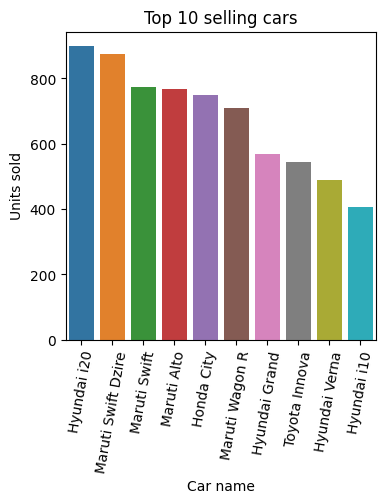

In [40]:
sns.barplot(data=unit_df,x='Car name',y='Units sold')
plt.xticks(rotation=80)
plt.title('Top 10 selling cars')
;

- The most selling car is Hyundai i20 with 906 units sold.
- Maruti as a brand have most cars in top 10 selling cars.

#### Q2 Our company has a 4 year old used hyundai i20, how should we price it?

In [41]:
hi20_df=usedcar_df[usedcar_df['car_name']=='Hyundai i20']
hi20_df=hi20_df[['vehicle_age','selling_price']]
hi20_df.head()

,vehicle_age,selling_price
2,11,215000
28,3,700000
35,3,850000
36,3,598000
49,5,750000


In [42]:
hi20_df.groupby('vehicle_age',as_index=False).mean()

,vehicle_age,selling_price
0,1,669375.000000
1,2,714600.000000
2,3,705685.039370
3,4,638007.407407
4,5,594008.196721
5,6,549867.647059
6,7,476797.297297
7,8,397171.052632
8,9,378144.927536
9,10,316195.121951


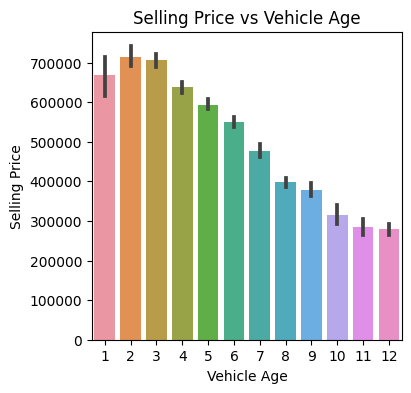

In [43]:
sns.barplot(data=hi20_df,x='vehicle_age',y='selling_price')
plt.xlabel('Vehicle Age')
plt.ylabel('Selling Price')
plt.title('Selling Price vs Vehicle Age');

- The error bar are not very large for 4year old cars so we can conclude the value of car is about the mean value only.
- The car can be **priced between 610k and 650k**.
- It must be noted that the price of a car depends on many other factors such as conditioning,varient.

#### Q3 Our company want to increase the sales bt 10% next , what are your suggestion?

In [44]:
revenue_df=usedcar_df.groupby('brand',as_index=False)['selling_price'].sum().sort_values(by='selling_price',ascending=False).head(10)
revenue_df.columns=('Brand','Total Revenue')

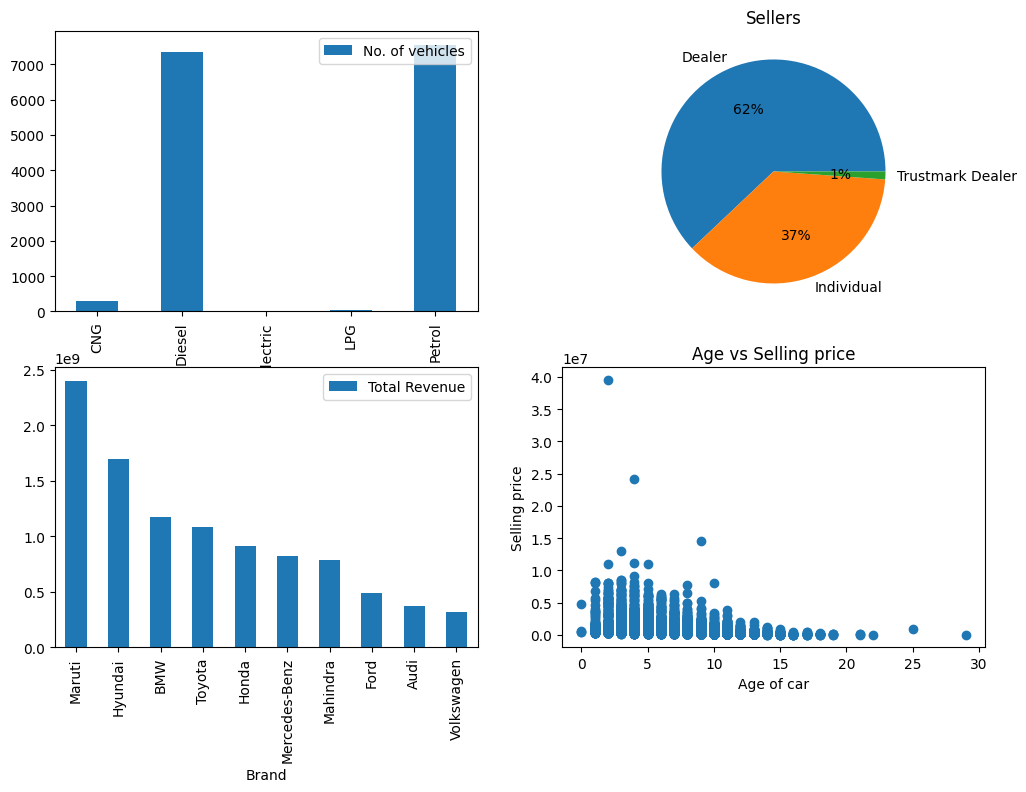

In [45]:
fig,axes=plt.subplots(2,2,figsize=(12,8))
fuel_type_df.plot(ax=axes[0,0],kind='bar',x='Fuel Type',y='No. of vehicles')
axes[0,1].pie(carseller_df['No. of cars'],labels=carseller_df['Seller_type'],autopct='%.0f%%')
axes[0,1].set_title('Sellers')
revenue_df.plot(ax=axes[1,0],kind='bar',x='Brand',y='Total Revenue')
axes[1,1].scatter('vehicle_age','selling_price',data=usedcar_df)
axes[1,1].set_title('Age vs Selling price')
axes[1,1].set_xlabel('Age of car')
axes[1,1].set_ylabel('Selling price');

- First chart indicates that their are very CNG, LPG and Electrical cars,these are groeing markets as the world is moving towards a clean energy.So,**focus should be increasing CNG,LPG and Electrical cars**.
- Indivisual seller percentage is very less as in the real markets there are more indivisual sellers than dealers.**More indivisuals should be reached through advertisement or marketing campaign**.
- Chart 3 indicates the brands which caused most revenue.**Adding more cars from the brand that gave most revenue**.
- Age of car is inversly proportional to its selling price.**Less age cars give better selling price so better revenue and profit margins**.

#### Q4 Which are the costliest cars on the platform?

In [46]:
costliest_car_df=usedcar_df[['car_name','selling_price']].sort_values(by='selling_price',ascending=False).head(10)
costliest_car_df

,car_name,selling_price
3799,Ferrari GTC4Lusso,39500000
10969,Rolls-Royce Ghost,24200000
1172,Bentley Continental,14500000
9722,Mercedes-Benz S-Class,13000000
9364,Porsche Cayenne,11100000
10989,Mercedes-Benz S-Class,11000000
1888,Mercedes-Benz S-Class,11000000
11000,Land Rover Rover,9200000
8439,BMW 7,8500000
3096,BMW 7,8500000


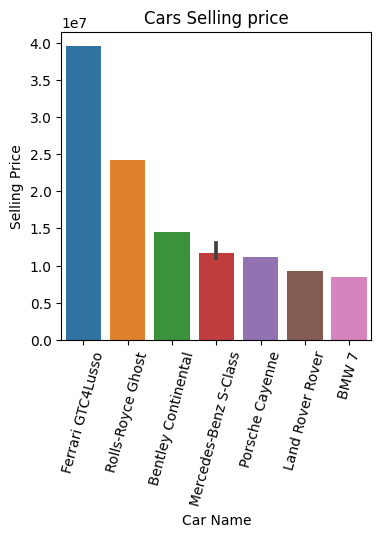

In [47]:
sns.barplot(data=costliest_car_df,x='car_name',y='selling_price')
plt.xlabel('Car Name')
plt.ylabel('Selling Price')
plt.title('Cars Selling price')
plt.xticks(rotation=75);

- The costliest car is Ferrari GTC4Lusso.
- Which sells at price 3.95cr.

#### Q5 Due to the rules of indian government diesel cars can only run for 10 years and petrol cars can run for 15 years after that you need to br scraped which leads to waste much resources and money.How can we minimize the wastage?

<Axes: xlabel='vehicle_age', ylabel='Count'>

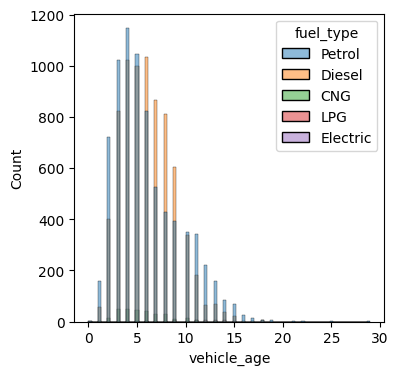

In [48]:
sns.histplot(data=usedcar_df,x='vehicle_age',hue='fuel_type')

- From the above histogram its clear there are many cars which have been sold after expiry or very near expiry which leads to loss in its value.To avoids these problems we can **filter out such cars and push them through recmondations and ads also checking the value according to its age will decrease losses**.

### Inferences and Conclusions

We have analysed the dataset and drew few conclusions,answered some questions.Lets just have a small recap
- Maruti sells highest cars due to its low cost and high mileage.
- Electric cars are most expensive and hold very less market size.
- Maximum cars offers mileage about 20kmpl, diesel cars offer a better mileage.
- Market id dominated by seller with manual cars.
- Cars lost their value with years and km driven.

### Future Work

- New cars sold in india trends and growth.
- Price recommendation system.
- Electric car market.

### References

Check out the following Rescources to learn more about datasets or modules of python.
- 1 Used Car Dataset:
  https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
- 2 Pandas User Guide:
  https://pandas.pydata.org/docs/user_guide/index.html
- 3 Seaborn User Guide:
  https://seaborn.pydata.org/tutorial.html
- 4 Opendatasets Library:
  https://github.com/JovianHQ/opendatasets

Have a nice day!